In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('Books.csv', low_memory=False)
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')
amazon = pd.read_csv('amazon.csv')
flipkart = pd.read_csv('flipkart.csv')

#### PREPROCESSING

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
amazon.rename(columns={
    'amazon_title': 'Title',
    'amazon_author': 'Author',
    'amazon_isbn-10': 'ISBN',
    'amazon_reviews count': 'Reviews Count',
    'amazon_rating': 'Rating',
    'amazon_price': 'Amazon Price'
}, inplace=True)
amazon.head()

,Title,Author,Rating,Reviews Count,ISBN,Amazon Price
0,Tell Me your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209
1,The Boy in the Striped Pyjamas (Definitions),by John Boyne,4.6,134.0,1862305277,350
2,Romancing the Balance Sheet: For Anyone Who Ow...,by Anil Lamba,4.5,156.0,9350294311,477
3,Mossad,by Michael Bar-Zohar - Import,4.6,637.0,8184958455,340
4,My Story,by Kamala Das,4.5,42.0,8172238975,178


In [7]:
flipkart.rename(columns={
    'flipkart_title': 'Title',
    'flipkart_author': 'Author',
    'flipkart_isbn10': 'ISBN',
    'flipkart_ratings count': 'Reviews Count',
    'flipkart_stars': 'Rating',
    'flipkart_price': 'Flipkart Price'
}, inplace=True)
flipkart.head()

,Author,ISBN,Title,Reviews Count,Flipkart Price,Rating
0,Sidney Sheldon,8172234902,TELL ME YOUR DREAMS,902,209,4.5
1,,1862305277,The Boy in the Striped Pyjamas,83,372,4.5
2,Anil Lamba,9350294311,ROMANCING THE BALANCE SHEET,352,477,4.5
3,Bar-Zohar Michael,8184958455,Mossad,560,280,4.5
4,Kamala Das,8172238975,MY STORY,322,178,4.3


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1382 non-null   object
 1   Author         1382 non-null   object
 2   Rating         1378 non-null   object
 3   Reviews Count  1378 non-null   object
 4   ISBN           1382 non-null   int64 
 5   Amazon Price   1382 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [12]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          1382 non-null   object
 1   ISBN            1382 non-null   int64 
 2   Title           1382 non-null   object
 3   Reviews Count   1382 non-null   object
 4   Flipkart Price  1382 non-null   int64 
 5   Rating          1382 non-null   object
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [13]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [16]:
amazon = amazon.dropna()
amazon.isnull().sum()

Title            0
Author           0
Rating           0
Reviews Count    0
ISBN             0
Amazon Price     0
dtype: int64

In [17]:
flipkart.isnull().sum()

Author            0
ISBN              0
Title             0
Reviews Count     0
Flipkart Price    0
Rating            0
dtype: int64

In [18]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [19]:
# Function to standardize titles to title case
def standardize_title(title):
    return title.strip().title()  # Strip leading/trailing whitespace and convert to title case

# Apply to each dataset
books['Book-Title'] = books['Book-Title'].apply(standardize_title)
amazon['Title'] = amazon['Title'].apply(standardize_title)
flipkart['Title'] = flipkart['Title'].apply(standardize_title)

# Display standardized datasets
print("Books Dataset:\n", books)
print("\nAmazon Dataset:\n", amazon)
print("\nFlipkart Dataset:\n", flipkart)

Books Dataset:
               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision In Normandy   
3       0374157065  Flu: The Story Of The Great Influenza Pandemic...   
4       0393045218                             The Mummies Of Urumchi   
...            ...                                                ...   
271355  0440400988                         There'S A Bat In Bunk Five   
271356  0525447644                            From One To One Hundred   
271357  006008667X  Lily Dale : The True Story Of The Town That Ta...   
271358  0192126040                        Republic (World'S Classics)   
271359  0767409752  A Guided Tour Of Rene Descartes' Meditations O...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1  

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Merge ratings with books to include author and publisher info
ratings_with_books = ratings.merge(books, on='ISBN', how='left')

# Step 2: Calculate average ratings and number of ratings for each author
author_ratings = ratings_with_books.groupby('Book-Author')['Book-Rating'].agg(['mean', 'count']).reset_index()
author_ratings.rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'}, inplace=True)

# Filter authors with a minimum number of ratings for reliability (e.g., at least 50 ratings)
top_authors = author_ratings[author_ratings['num_ratings'] >= 50].sort_values(by='avg_rating', ascending=False).head(10)

# Step 3: Calculate average ratings and number of ratings for each publisher
publisher_ratings = ratings_with_books.groupby('Publisher')['Book-Rating'].agg(['mean', 'count']).reset_index()
publisher_ratings.rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'}, inplace=True)

# Filter publishers with a minimum number of ratings (e.g., at least 50 ratings)
top_publishers = publisher_ratings[publisher_ratings['num_ratings'] >= 50].sort_values(by='avg_rating', ascending=False).head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\2583359741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='Book-Author', data=top_authors, palette='crest')


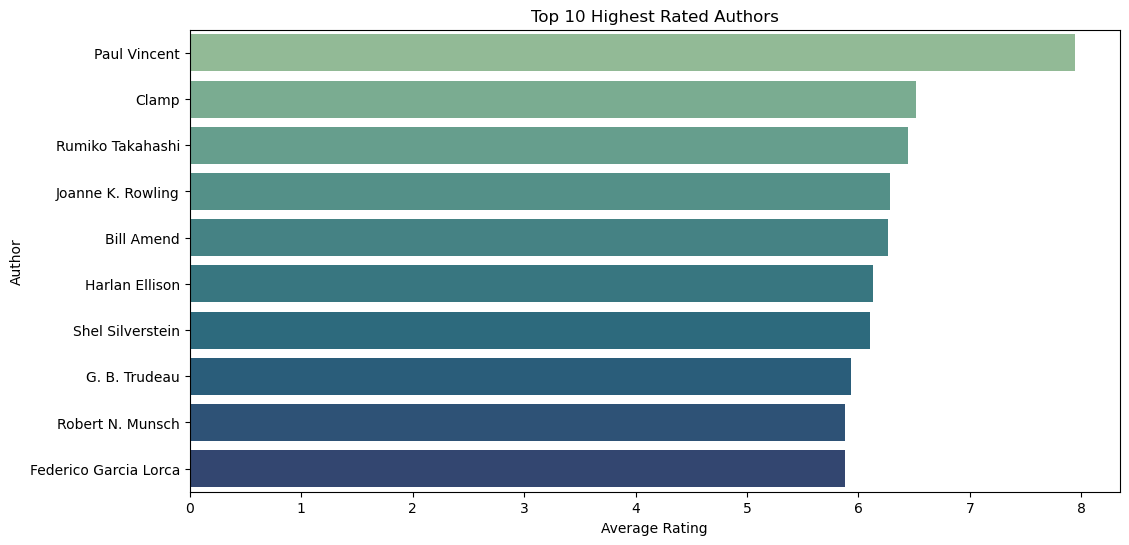

In [21]:
# Plot top-rated authors
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_rating', y='Book-Author', data=top_authors, palette='crest')
plt.title('Top 10 Highest Rated Authors')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\751969047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='Publisher', data=top_publishers, palette='rocket')


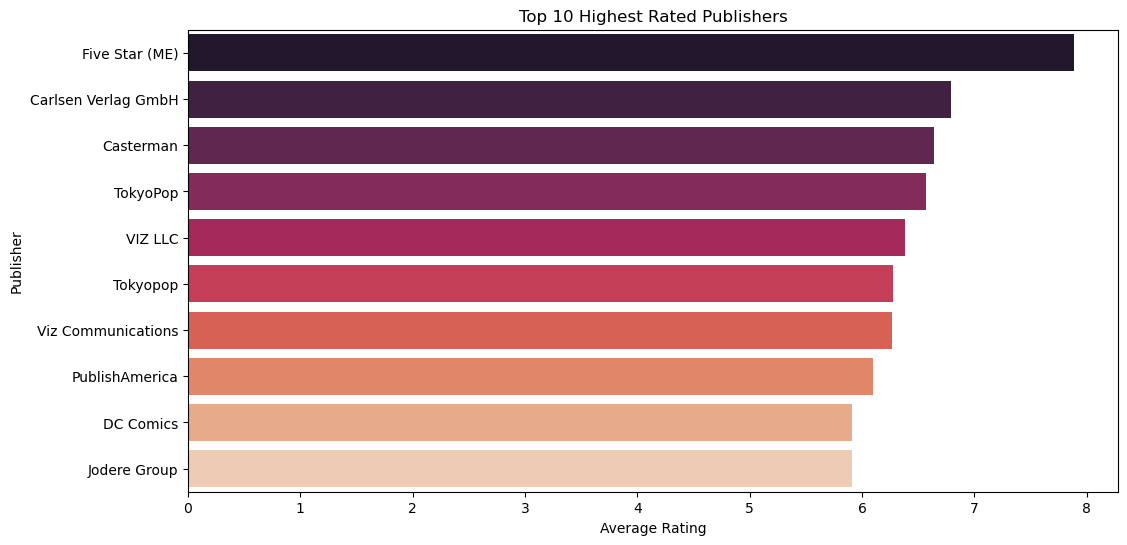

In [22]:
# Plot top-rated publishers
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_rating', y='Publisher', data=top_publishers, palette='rocket')
plt.title('Top 10 Highest Rated Publishers')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\3616332750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_active_users.index, y=most_active_users.values , palette='magma')


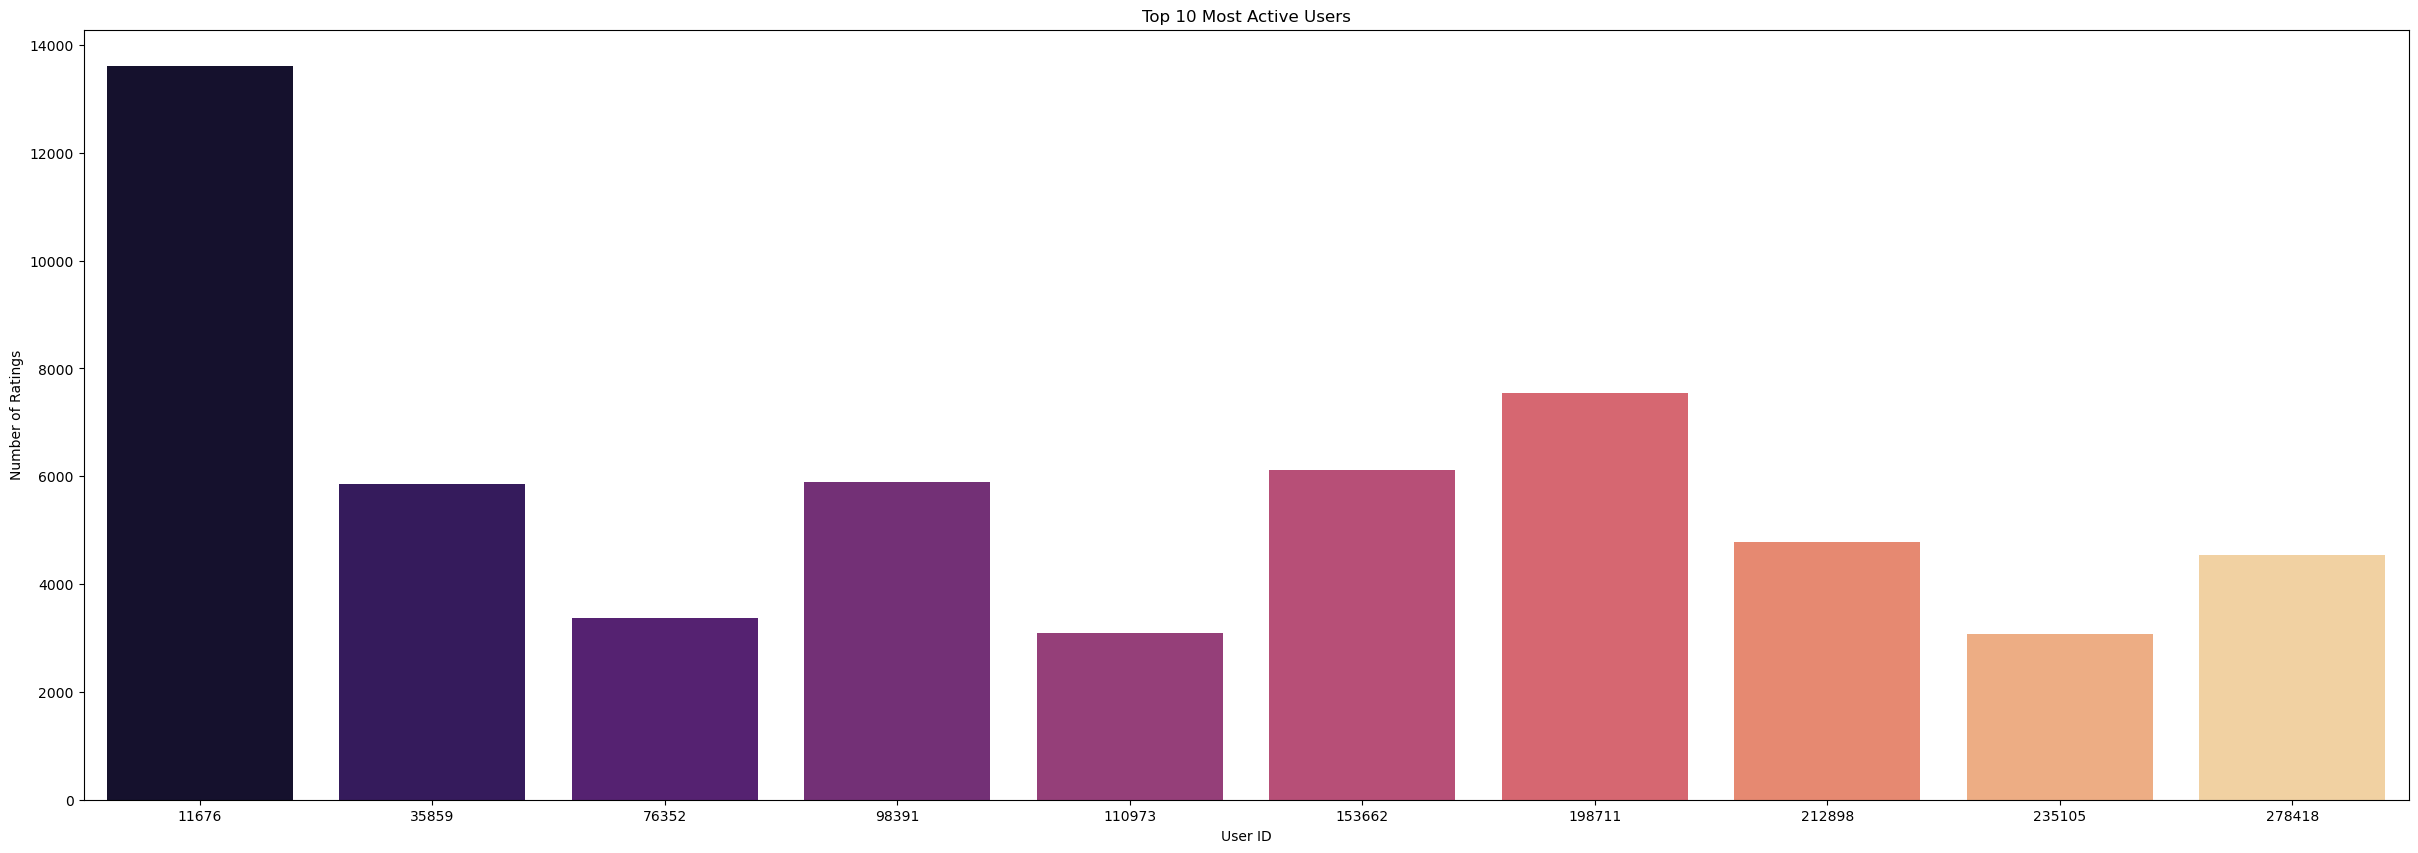

In [23]:
# Count number of ratings per user
most_active_users = ratings.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False).head(10)

# Plot the top 10 most active users
plt.figure(figsize=(30,10))
sns.barplot(x=most_active_users.index, y=most_active_users.values , palette='magma')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

# POPULARITY BASED FILTERING

In [24]:
ratings_with_name = ratings.merge(books , on= 'ISBN')

In [25]:
num_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,!%@ (A Nutshell Handbook),2
1,!Arriba! Comunicacion Y Cultura,2
2,"!Trato Hecho!: Spanish For Real Life, Combined...",1
3,!Yo!,11
4,$14 In The Bank (Cathy Collection),5
...,...,...
237903,Ã?Â?Lpiraten.,2
237904,Ã?Â?Rger Mit Produkt X. Roman.,4
237905,Ã?Â?Sterlich Leben.,1
237906,Ã?Â?Stlich Der Berge.,3


In [26]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().round(2).reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,!%@ (A Nutshell Handbook),3.00
1,!Arriba! Comunicacion Y Cultura,4.50
2,"!Trato Hecho!: Spanish For Real Life, Combined...",5.00
3,!Yo!,5.18
4,$14 In The Bank (Cathy Collection),1.80
...,...,...
237903,Ã?Â?Lpiraten.,0.00
237904,Ã?Â?Rger Mit Produkt X. Roman.,5.25
237905,Ã?Â?Sterlich Leben.,7.00
237906,Ã?Â?Stlich Der Berge.,2.67


In [27]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,!%@ (A Nutshell Handbook),2,3.00
1,!Arriba! Comunicacion Y Cultura,2,4.50
2,"!Trato Hecho!: Spanish For Real Life, Combined...",1,5.00
3,!Yo!,11,5.18
4,$14 In The Bank (Cathy Collection),5,1.80
...,...,...,...
237903,Ã?Â?Lpiraten.,2,0.00
237904,Ã?Â?Rger Mit Produkt X. Roman.,4,5.25
237905,Ã?Â?Sterlich Leben.,1,7.00
237906,Ã?Â?Stlich Der Berge.,3,2.67


In [28]:
popular_df = popular_df[popular_df['num_ratings'] >= 400].sort_values(['avg_rating', 'num_ratings'], ascending=[False, False]).head(50)

In [29]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [30]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter And The Prisoner Of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.85
3,Harry Potter And The Chamber Of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.18
6,Harry Potter And The Sorcerer'S Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.90
8,To Kill A Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.70
16,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,898,4.64
22,The Catcher In The Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,449,4.55
29,The Five People You Meet In Heaven,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...,430,4.55
31,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,1295,4.47
32,The Secret Life Of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,774,4.45
38,"Tuesdays With Morrie: An Old Man, A Young Man,...",MITCH ALBOM,http://images.amazon.com/images/P/0385484518.0...,493,4.35


# COLLABORATIVE BASED FILTERING

In [31]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [32]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [33]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [34]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [35]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [36]:
pt.fillna(0,inplace=True)

In [37]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1St To Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend In The Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year Of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen And The Art Of Motorcycle Maintenance: An Inquiry Into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
similarity_scores = cosine_similarity(pt)

In [40]:
similarity_scores.shape

(718, 718)

In [41]:
def recommend(book_name, use_svd=False):
    if use_svd:
        similarity_matrix = similarity_scores_svd
    else:
        similarity_matrix = similarity_scores
    
    if book_name not in pt.index:
        return f"'{book_name}' not found in the dataset."
    
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_matrix[index])), key=lambda x: x[1], reverse=True)[0:6]

    data = []
    for i in similar_items:
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item = [temp_df['Book-Title'].values[0], temp_df['Book-Author'].values[0], temp_df['Image-URL-M'].values[0]]
        data.append(item)
    
    return data

In [46]:
recommend('The Notebook')

[['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg'],
 ['A Walk To Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['One Door Away From Heaven',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582755.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg'],
 ['The Five People You Meet In Heaven',
  'Mitch Albom',
  'http://images.amazon.com/images/P/0786868716.01.MZZZZZZZ.jpg']]

## PRICE COMPARISION AMAZON v/s FLIPKART

In [94]:
# Merge the two datasets on ISBN to align the corresponding books
merged_data = pd.merge(amazon, flipkart, on='ISBN', suffixes=('_amazon', '_flipkart'))

# Convert the price columns to numeric values (remove currency symbols if needed)
merged_data['Amazon Price'] = pd.to_numeric(merged_data['Amazon Price'], errors='coerce')
merged_data['Flipkart Price'] = pd.to_numeric(merged_data['Flipkart Price'], errors='coerce')

In [95]:
merged_data['Price Difference'] = merged_data['Amazon Price'] - merged_data['Flipkart Price']

# Display the merged dataset with price differences
print("\nMerged Data with Price Comparison:\n", 
      merged_data[['Title_amazon', 'Author_amazon', 'ISBN', 'Amazon Price', 'Flipkart Price', 'Price Difference']]
      .rename(columns={'Title_amazon': 'Title', 
                       'Author_amazon': 'Name', 
                       'ISBN': 'ISBN', 
                       'Amazon Price': 'Amazon Price', 
                       'Flipkart Price': 'Flipkart Price', 
                       'Price Difference': 'Price Difference'}))

# Save the merged data for further analysis if needed
merged_data.to_csv('merged_book_prices.csv', index=False)


Merged Data with Price Comparison:
                                                   Title                 Name  \
0                                   Tell Me Your Dreams    by Sidney Sheldon   
1                                   Tell Me Your Dreams    by Sidney Sheldon   
2                                   Tell Me Your Dreams    by Sidney Sheldon   
3                                   Tell Me Your Dreams    by Sidney Sheldon   
4                                   Tell Me Your Dreams    by Sidney Sheldon   
...                                                 ...                  ...   
4377  Geronimo Stilton And The Kingdom Of Fantasy #8...  by Geronimo Stilton   
4378  Harry Potter And The Deathly Hallows (Harry Po...      by J.K. Rowling   
4379                                    Sita'S Ramayana      by Samhita Arni   
4380     The Maze Runner #02 Scorch Trials Movie Tie-In     by James Dashner   
4381    Tom Gates #10: Super Good Skills (Almost . . .)              by NILL   

  

In [96]:
merged_data

,Title_amazon,Author_amazon,Rating_amazon,Reviews Count_amazon,ISBN,Amazon Price,Author_flipkart,Title_flipkart,Reviews Count_flipkart,Flipkart Price,Rating_flipkart,Price Difference
0,Tell Me Your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,Tell Me Your Dreams,902,209,4.5,0
1,Tell Me Your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,Tell Me Your Dreams,902,209,4.5,0
2,Tell Me Your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,Tell Me Your Dreams,902,209,4.5,0
3,Tell Me Your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,Tell Me Your Dreams,902,209,4.5,0
4,Tell Me Your Dreams,by Sidney Sheldon,4.4,160.0,8172234902,209,Sidney Sheldon,Tell Me Your Dreams,902,209,4.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4377,Geronimo Stilton And The Kingdom Of Fantasy #8...,by Geronimo Stilton,4.6,329.0,9385887815,274,Stilton Geronimo,Geronimo Stilton And The Kingdom Of Fantasy #8,626,360,4.5,-86
4378,Harry Potter And The Deathly Hallows (Harry Po...,by J.K. Rowling,4.6,352.0,1408855712,666,J. K. Rowling,Harry Potter And The Deathly Hallows,2083,452,4.7,214
4379,Sita'S Ramayana,by Samhita Arni,3.6,5.0,9380340036,542,Arni Samhita,Sita'S Ramayana,19,550,4.1,-8
4380,The Maze Runner #02 Scorch Trials Movie Tie-In,by James Dashner,3.9,56.0,9351039684,247,James Dashner,The Scorch Trials,180,234,4.6,13


C:\Users\HP\AppData\Local\Temp\ipykernel_8340\47297916.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


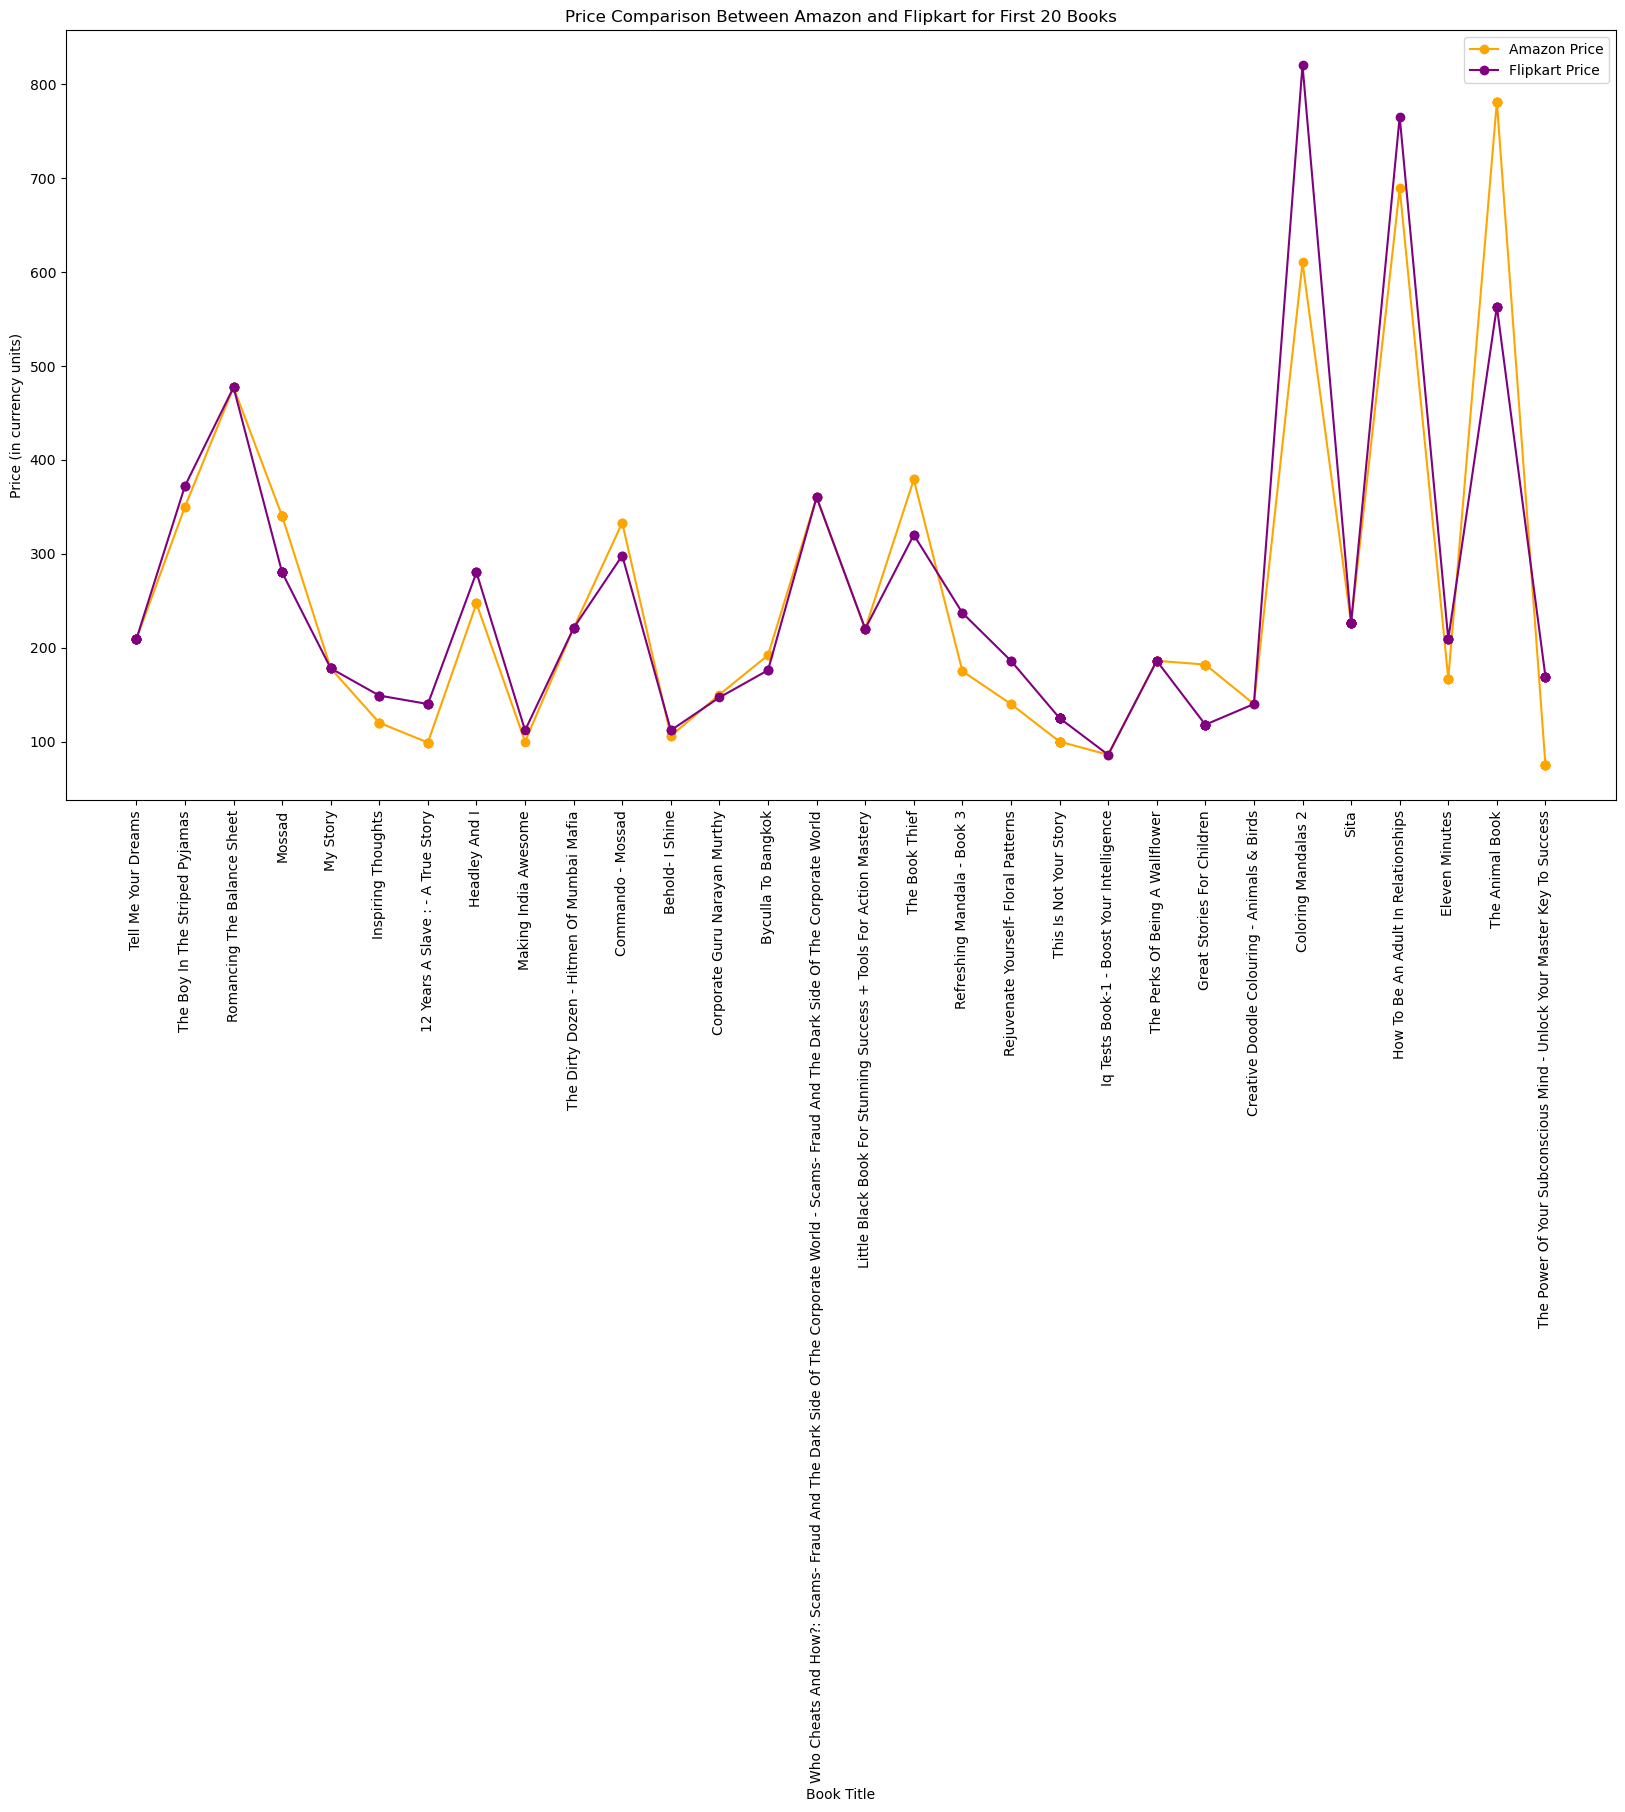

In [97]:
# # Plot the price comparison for the first 20 books
# Select the books for comparison
top_20_books = merged_data.head(100)

# Create the figure
plt.figure(figsize=(20,10))

# Line plot for Amazon prices
plt.plot(top_20_books['Title_flipkart'], top_20_books['Amazon Price'], marker='o', label='Amazon Price', color='orange')

# Line plot for Flipkart prices
plt.plot(top_20_books['Title_flipkart'], top_20_books['Flipkart Price'], marker='o', label='Flipkart Price', color='purple')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Add labels, title, and legend
plt.title('Price Comparison Between Amazon and Flipkart for First 20 Books')
plt.xlabel('Book Title')
plt.ylabel('Price (in currency units)')
plt.legend()

# Ensure proper layout
plt.tight_layout()

# Show the plot
plt.show()


In [98]:
### Further Analysis ###

# Find books that are significantly cheaper on Amazon or Flipkart
cheaper_on_amazon = merged_data[merged_data['Price Difference'] > 0]
cheaper_on_flipkart = merged_data[merged_data['Price Difference'] < 0]

print("\nBooks Cheaper on Amazon:\n", cheaper_on_amazon[['Title_amazon', 'Author_amazon', 'Amazon Price', 'Flipkart Price', 'Price Difference']].head())
print("\nBooks Cheaper on Flipkart:\n", cheaper_on_flipkart[['Title_flipkart', 'Author_flipkart', 'Amazon Price', 'Flipkart Price', 'Price Difference']].head())



Books Cheaper on Amazon:
    Title_amazon                  Author_amazon  Amazon Price  Flipkart Price  \
11       Mossad  by Michael Bar-Zohar - Import           340             280   
12       Mossad  by Michael Bar-Zohar - Import           340             280   
13       Mossad  by Michael Bar-Zohar - Import           340             280   
14       Mossad  by Michael Bar-Zohar - Import           340             280   
15       Mossad  by Michael Bar-Zohar - Import           340             280   

    Price Difference  
11                60  
12                60  
13                60  
14                60  
15                60  

Books Cheaper on Flipkart:
                     Title_flipkart         Author_flipkart  Amazon Price  \
6   The Boy In The Striped Pyjamas                                   350   
7   The Boy In The Striped Pyjamas                                   350   
22              Inspiring Thoughts    Abdul Kalam A. P. J.           120   
23              Inspi

In [99]:
def show_book_prices_in_ascending_order(book_title, merged_data):
    # Filter the dataset by the given book title
    filtered_books = merged_data[(merged_data['Title_amazon'].str.contains(book_title, case=False)) | 
                                 (merged_data['Title_flipkart'].str.contains(book_title, case=False))]

    # Sort by both Amazon and Flipkart prices
    sorted_books = filtered_books[['Title_amazon', 'Author_amazon', 'Amazon Price', 'Flipkart Price']].sort_values(by=['Amazon Price', 'Flipkart Price'], ascending=True)

    # Display the sorted results
    if not sorted_books.empty:
        print(f"\nPrices for '{book_title}' in Ascending Order:")
        print(sorted_books)
    else:
        print(f"\nNo books found with the title: {book_title}")

# Example usage: show prices of a book in ascending order
show_book_prices_in_ascending_order('Harry Potter', merged_data)


Prices for 'Harry Potter' in Ascending Order:
                                           Title_amazon    Author_amazon  \
1466                     Harry Potter Aur Paras Patthar  by J.K. Rowling   
139            Harry Potter And The Philosopher'S Stone  by J.K. Rowling   
140            Harry Potter And The Philosopher'S Stone  by J.K. Rowling   
141            Harry Potter And The Philosopher'S Stone  by J.K. Rowling   
142            Harry Potter And The Philosopher'S Stone  by J.K. Rowling   
...                                                 ...              ...   
1395  Harry Potter And The Order Of The Phoenix (Har...  by J.K. Rowling   
4373  Harry Potter And The Order Of The Phoenix (Har...  by J.K. Rowling   
4374  Harry Potter And The Order Of The Phoenix (Har...  by J.K. Rowling   
2919             Harry Potter And The Half Blood Prince  by J.K. Rowling   
4378  Harry Potter And The Deathly Hallows (Harry Po...  by J.K. Rowling   

      Amazon Price  Flipkart Price  
146

In [100]:
# Function to standardize titles to title case
def standardize_title(title):
    return title.strip().title()  # Strip leading/trailing whitespace and convert to title case

# Apply to each dataset
books['Book-Title'] = books['Book-Title'].apply(standardize_title)
amazon['Title'] = amazon['Title'].apply(standardize_title)
flipkart['Title'] = flipkart['Title'].apply(standardize_title)

# Display standardized datasets
print("Books Dataset:\n", books)
print("\nAmazon Dataset:\n", amazon)
print("\nFlipkart Dataset:\n", flipkart)

Books Dataset:
               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision In Normandy   
3       0374157065  Flu: The Story Of The Great Influenza Pandemic...   
4       0393045218                             The Mummies Of Urumchi   
...            ...                                                ...   
271355  0440400988                         There'S A Bat In Bunk Five   
271356  0525447644                            From One To One Hundred   
271357  006008667X  Lily Dale : The True Story Of The Town That Ta...   
271358  0192126040                        Republic (World'S Classics)   
271359  0767409752  A Guided Tour Of Rene Descartes' Meditations O...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1  

# RECOMMENDATIONS BASED ON USER'S LOCATION

In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# 1. Encode location into numeric format for clustering
label_encoder = LabelEncoder()
users['Location_encoded'] = label_encoder.fit_transform(users['Location'])

# 2. Apply K-means clustering based on location
kmeans = KMeans(n_clusters=1000, random_state=0)  # Adjust clusters based on data size
users['Location_Cluster'] = kmeans.fit_predict(users[['Location_encoded']])

# 3. Function to recommend books based on user’s cluster
def recommend_books(user_id):
    # Find the user's location cluster
    user_cluster = users.loc[users['User-ID'] == user_id, 'Location_Cluster'].values[0]
    
    # Find all users in the same cluster
    same_cluster_users = users[users['Location_Cluster'] == user_cluster]['User-ID']
    
    # Find all books rated by users in this cluster
    cluster_ratings = ratings[ratings['User-ID'].isin(same_cluster_users)]
    
    # Get the top 7 most rated ISBNs in this cluster
    popular_isbns = cluster_ratings['ISBN'].value_counts().head(10).index.tolist()
    
    # Map these ISBNs to book titles
    popular_titles = books[books['ISBN'].isin(popular_isbns)]['Book-Title'].tolist()

    print(f"\nRecommended Books for User \"{user_id}\" based on Location:\n")
    for title in popular_titles:
        print(title)

In [109]:
recommend_books(44)


Recommended Books for User "44" based on Location:

Wild Animus
The Lovely Bones: A Novel
Fight Club
The Fellowship Of The Ring (The Lord Of The Rings, Part 1)
Harry Potter And The Sorcerer'S Stone (Harry Potter (Paperback))
Harry Potter And The Chamber Of Secrets (Book 2)
The Bonesetter'S Daughter
Harry Potter And The Prisoner Of Azkaban (Book 3)
Thief Of Time
Getting Mother'S Body : A Novel
